In [1]:
import keras
keras.__version__

'2.10.0'

In [2]:
from keras.layers import SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 166ms/step - loss: 0.6167 - acc: 0.6493 - val_loss: 0.5312 - val_acc: 0.7424
Epoch 2/10
157/157 [==============================] - 25s 161ms/step - loss: 0.3896 - acc: 0.8386 - val_loss: 0.4555 - val_acc: 0.7918
Epoch 3/10
157/157 [==============================] - 25s 160ms/step - loss: 0.2917 - acc: 0.8841 - val_loss: 0.5358 - val_acc: 0.7934
Epoch 4/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2382 - acc: 0.9104 - val_loss: 0.4239 - val_acc: 0.8182
Epoch 5/10
157/157 [==============================] - 26s 168ms/step - loss: 0.1860 - acc: 0.9302 - val_loss: 0.4154 - val_acc: 0.8300
Epoch 6/10
157/157 [==============================] - 27s 170ms/step - loss: 0.1305 - acc: 0.9553 - val_loss: 0.4239 - val_acc: 0.8280
Epoch 7/10
157/157 [==============================] - 27s 173ms/step - loss: 0.0909 - acc: 0.9692 - val_loss: 0.4768 - val_acc: 0.8328
Epoch 8/10
157/157 [==============================] - 2

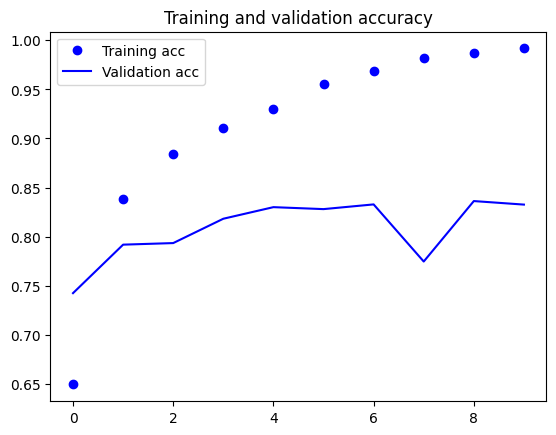

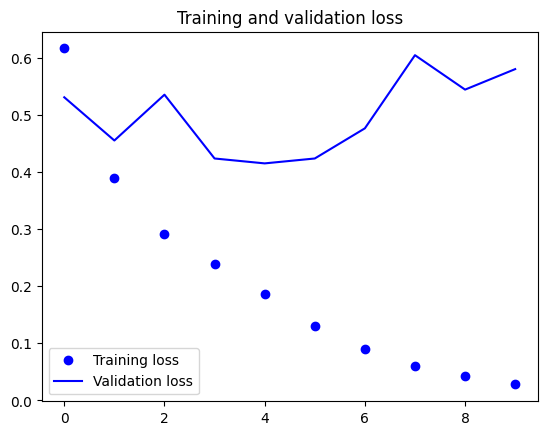

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 79s 474ms/step - loss: 0.5087 - acc: 0.7609 - val_loss: 0.3677 - val_acc: 0.8508
Epoch 2/10
157/157 [==============================] - 69s 438ms/step - loss: 0.2942 - acc: 0.8827 - val_loss: 0.3467 - val_acc: 0.8490
Epoch 3/10
157/157 [==============================] - 71s 453ms/step - loss: 0.2290 - acc: 0.9126 - val_loss: 0.3216 - val_acc: 0.8870
Epoch 4/10
157/157 [==============================] - 71s 451ms/step - loss: 0.1978 - acc: 0.9277 - val_loss: 0.3375 - val_acc: 0.8764
Epoch 5/10
157/157 [==============================] - 67s 425ms/step - loss: 0.1740 - acc: 0.9380 - val_loss: 0.3056 - val_acc: 0.8904
Epoch 6/10
157/157 [==============================] - 65s 413ms/step - loss: 0.1563 - acc: 0.9449 - val_loss: 0.3091 - val_acc: 0.8882
Epoch 7/10
157/157 [==============================] - 68s 434ms/step - loss: 0.1471 - acc: 0.9489 - val_loss: 0.3205 - val_acc: 0.8886
Epoch 8/10
157/157 [==============================] - 6

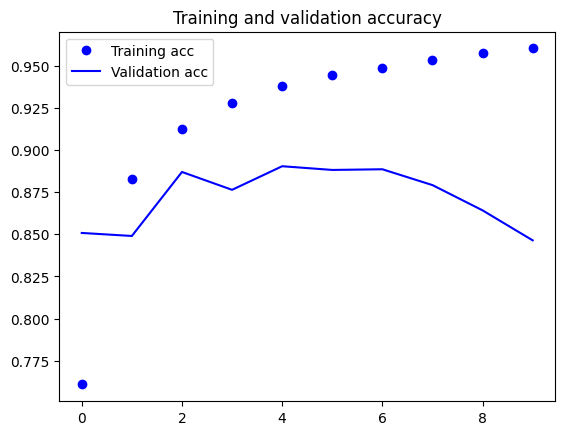

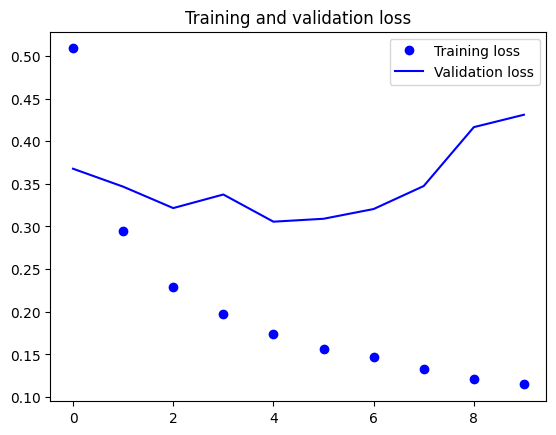

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()